## Read data

In [1]:
import csv
reader = [line for line in csv.reader(open('all_kindle_review.csv'))][1:]

In [2]:
import numpy as np
reviews = np.asarray([[line[2], line[5], line[7], line[9], line[4]] for line in reader])

## Preprocess text

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mirun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mirun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import string
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words_nltk = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # it makes sense to keep punctuation, emoticons and emojis
    # lowercase text, remove newline characters and digits
    # tokenize into separate words

    # tfidf
    text = ' '.join([word.lower() for word in text.split() if not word[0].isdigit()])
    text = ' '.join([word for word in word_tokenize(text)])

    # word2vec
#     text = ' '.join(word_tokenize(' '.join(tokenizer.tokenize(phrase.lower())))
#     text = ' '.join([word for word in word_tokenize(text) if word not in stop_words_nltk])

    re.sub(' +', ' ', text)
    return text

## Split data

In [5]:
from sklearn.model_selection import train_test_split

texts = np.array([preprocess(line[1]) for line in reviews])
labels = np.array([line[4] for line in reviews], dtype='int')
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.20, random_state=42)

## Vectorizer

In [6]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\mirun\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec

def word_embedding(vectorizer):
    if vectorizer == 'tfidf':
        vectorizer = TfidfVectorizer(max_features = 1000)
        train_data = vectorizer.fit_transform(train_texts)
        test_data = vectorizer.transform(test_texts)
    elif vectorizer == 'w2v':
        def getVectorization(text):
            vects = []
            for word in text.split():
                try:
                    vects.append(w2v.wv.get_vector(word))
                except:
                    print(word)
            return vects

        brownData = [' '.join(sentence) for sentence in brown.sents()]
        dataset = [preprocess(text).split() for text in np.array(list(train_texts) + brownData)]

        w2v = Word2Vec(sentences=dataset, vector_size=1000, window=5, min_count=1, workers=16)
        w2v.save("word2vec.model")

        train_data = [np.mean(np.array(getVectorization(preprocess(text))), axis=0) for text in train_texts]
        test_data = [np.mean(np.array(getVectorization(preprocess(text))), axis=0) for text in test_texts]

    return train_data, test_data

In [8]:
train_tfidf, test_tfidf = word_embedding('tfidf')
train_w2v, test_w2v = word_embedding('w2v')

excrable
occassion
istwo
thatbadlandsappears
non-traditional
badlands.comments
bonk-fest
ending.aside
hetherington
asexual
'darkest
mckinnon
enertaining
shiipping
close.if
print/digital
app.ok
imac
bookmobile
prohibitively
well-selected
nutcases
'fated
lartesha
begnning
te
organic.i
on-again
off-agin
old.i
raw.the
sequal
involvng
sucessfully
astroids
handle.the
needs.calla
xenos
crossbreed
'lazy-
i-don't-want-make-my-audience-uncomfortable-version
nlike
xenos
xenos
reciprocity
'even
xenos
off.that
underwhelming.the
rebellion/mission
xenos
compatibility
xenos
xenos
there.finally
offed
sideous
rurit
unapologetically
culture.i
teen-aged
setteachakidd
kindle.part
infromation.midler
midler
situtation
midler
events.part
repeatitive
ffffffff
knghthorse
standed
two.how
years.i
routine.the
finally.if
re-phrase
housemate
westmorelands/madarises
invisioned
harumped
spells.sounds
novel.so
deets
years.more
act.i
long.blake
sparklers
man/cat
disregards
me.warning
replicated
'teach
'greener
cutter.in

online/print
landfills
kjv
kjv
kindle.bible
kjv
orking
apocryphaorking
apocryphafor
intros
misbach
handbookhalley
-deluxe
editionor
unger
handbookthe
unger
mckettricks
angus
mckettrich
specialness
bytwin
games.plot
keeper.comments
near-exhibition
not-quite-private
with.-
details.opinion
firefighting
okay.3.5
factor.-cr-
stories.it
this.my
written.hidden
conked
loisaida
predecessor.the
cast-of-thousands
loisaida
unflinching
metaphoric
terminally
dies.the
tantalisingly
nicklinson
response.fortunately
storyis
invasiveness
nail-biter
satisfying.two
quartile
grippingness
.very
protaganist
guys/gals
centaurs
mission.basically
darcey
darcey
billiards
billiards
suite.brody
dosent
with.first
value-
this.this
mond
deffinately
daiologue
friend-with-benefits
complicates
matter.billy
garden.vivianreviewed
trys
proofer
fun-to-read
it.quinn
wife-induced
dragonseer
dragoneers
overlong
dragonseer
storyline.i
egocentricity
europeons
wsj.england
europeon
brits
'redeems
snowman
factory-style
grandfatherly

mclinn
near-term
pharaohs
tua
pharaoh
rames
croc
pharoeh
ka
tua
tua
her.it
done.if
comings.do
bi-sexuality
supersedes
work-related
op.and
unrecognizable.shawn
necessity.it
glossed-over
either.overall
thosei
me.=================the
territory.hero
light-skinned
hispanic
skinned
skinned
punjab.================plot
are:1.
culture.2
earth.3
vaccinations
too.4
oddity.5
munchkin
convincing.i
them.================summary
tranquilize
spaceship.she
uncivilised
non-sentient
hypersleep
newspaper.trying
kindle.hopefully
self-supporting
chastise
comma-happy
three.plot
melded
issue.overall
habits.the
free.ok
rufians
over.her
story.minerva
tea.one
fantasy-based
intriguing.emily
steamside
steamside
steamside
interesting.rather
steamside
confused.lydia
family.aunt
understood.michelle
recommendable
bysweet
bysteel
beauty.books
anthologymating
games.plot
partner.-
seeing-eye
abilities.-
future.-
sequence.-
fromfelicity
bareby
jaye
anddunmore
risingby
gia
dawn.-
them.4.5
heart.a
happy.-cr-
alert.why
dither

cyber
involved.the
heroine.also
job.just
desi
yuie
coulters
own.this
prickled
pay.overall
coulters
bookmarkcharacters
bookmarklove
toothless
hillbillies
woman/cougar
ta-dam
castrated.however
want.will
water.these
alisha
rai
well.setting/story
reporter/blogger
procedure.writing
diplomatically
all.warnings
sexoverall
exploits.now
envelop
swapped
comfortableness
action.nice
romances.a
shopgirl
brother.five
andreokos.in
out.as
impact.all
sub-
nages
nages.with
.now
'dates
date.needless
fbi-agent
fun.this
hell-cop
self-publish
fiverr
funny.support
chararacter
chapter.femilla
womankind
grievious
demeana
regent
afterlife.this
travel/time
crazy-making
chaffed
adulations
bracers
frazetta
artwork.before
armand
packing.when
long-gone
valdosta
right.this
authentic.highly
plain-spokenness
night.my
favorites1
beast2
billionaire3
paris4
billionaire5
billionaire6
sheikh7
required8
sheikh9
bride10
entertaining.hunter
easily.i
timelapse
ending.alex
occcurs
again.enjoy
.woman
stepsister
flight.a
lounge.th

easily.the
loud.unfortunately
setting.character
starslewis
depth.writing
starspeople
realism.editing/formatting
pg-14
flushes
mate.that
mate.protecting
nice-sized
friends/companions/family
omegas
omegas
flourish.the
story.get
head.that
rivited
genies
kritiquesrobin
again.wolf
erotica.the
challenge.all
hartsell
bundle.the
companionate
softy
story.gabe
layback
attract.jordan
gabe's.casey
enticing.overall
it's-so-bad-it's-good
screamingly
why-we-like-bad-entertainment
phenomenon.but
chupacabra
shopped
novel.as
chupacabra-
goatsucker
crypto-zoological
meat.unfortunately
cheetos
b-novel
such.as
chupacabra
-cardboard
editing.consider
caribbean-born
chupacabra
astronomist
due.you
lyla
'daddy
wanna-bes
down.retired
osi
israel.the
super-hero
windcathy
thunderbird
fromleaving
porcelin
moneey
goner
her.dee
s/m
s/m
'mystery
'mystery
neglect.this
whinney
irritating.it
woman.i
dilbert
read.nothing
confusing.there
improbable.this
severall
best.many
underwhelmed
sheppard
diploma
desire.sawyer
egotisti

In [9]:
train_data, test_data = train_tfidf.toarray(), test_tfidf.toarray()

In [ ]:
train_data, test_data = np.array(train_w2v), np.array(test_w2v)

## Supervised Baseline

In [97]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(train_data, train_labels)
print(np.mean(svc.predict(train_data) == train_labels))
print(np.mean(svc.predict(test_data) == test_labels))

0.9547916666666667
0.52625


## Spectral Clustering

In [121]:
!pip install pyamg

You should consider upgrading via the 'c:\users\mirun\anaconda3\python.exe -m pip install --upgrade pip' command.


In [157]:
# source: lab 6 solution
from sklearn.cluster import SpectralClustering

# train spectral clustering
sc=SpectralClustering(n_clusters=5, eigen_solver='arpack', assign_labels='discretize').fit(train_data)
predicted_labels = sc.labels_
n_clusters = np.max(sc.labels_) + 1

cluster_samples = dict()
for cluster_n in range(n_clusters):
    cluster_samples[cluster_n] = train_data[predicted_labels == cluster_n]

# get predictions
test_predictions = []
for test_sample in test_data:
    min_distances = []
    for cluster_n in range(n_clusters):
        distances = np.sum(np.square(cluster_samples[cluster_n] - test_sample), axis = 1)
        cluster_min_distance = np.min(distances)
        min_distances.append(cluster_min_distance)
    test_predictions.append(np.argmin(min_distances))
test_predictions = np.array(test_predictions)

# calculate confusion matrix
confusion_matrix = np.zeros((6, n_clusters + 1))
for train_label, predicted_label in zip(train_labels, predicted_labels):
    confusion_matrix[train_label][predicted_label + 1] += 1

print(confusion_matrix)

[[   0.    0.    0.    0.    0.    0.]
 [   0.  274.  244.  175.  393.  510.]
 [   0.  227.  372.  189.  288.  525.]
 [   0.  334.  403.  198.  244.  434.]
 [   0.  706.  541.  405.  377.  384.]
 [   0. 1023.  318.  335.  477.  224.]]


In [158]:
translate = dict()
for i in range(n_clusters + 1):
    translate[i] = np.argmax(confusion_matrix[:, i])

test_predictions = np.array([
    translate[label]
    for label in test_predictions
])

# prediction score
print(np.mean(test_predictions == test_labels))

0.17333333333333334


In [151]:
# cluster checking
for idd, label in enumerate(predicted_labels):
    if (label == 5):
        print(train_texts[idd],'\n', train_labels[idd], '\n')

## DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

In [104]:
# source: lab 6 solution
# find number of clusters for a few epsilon values
for d in np.linspace(0.1, 1, 25):
    dbscan = DBSCAN(eps = d).fit(train_data)
    n_clusters = np.max(dbscan.labels_) + 1
    print(set(dbscan.labels_), n_clusters, d)

{-1} 0 0.1
{-1} 0 0.1375
{-1} 0 0.175
{-1} 0 0.2125
{-1} 0 0.25
{-1} 0 0.2875
{-1} 0 0.32499999999999996
{-1} 0 0.36250000000000004
{-1} 0 0.4
{-1} 0 0.4375
{-1} 0 0.475
{-1} 0 0.5125
{-1} 0 0.5499999999999999
{-1} 0 0.5875
{0, -1} 1 0.625
{0, -1} 1 0.6625
{0, 1, -1} 2 0.7
{0, 1, 2, -1} 3 0.7374999999999999
{0, 1, 2, 3, 4, -1} 5 0.7749999999999999
{0, 1, 2, 3, 4, 5, 6, -1} 7 0.8125
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1} 10 0.85
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1} 12 0.8875
{0, 1, 2, 3, 4, 5, 6, -1} 7 0.9249999999999999
{0, 1, 2, 3, -1} 4 0.9624999999999999
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1} 15 1.0


In [14]:
for samples in range(1, 5):
    dbscan = DBSCAN(eps = 0.81, min_samples=samples).fit(train_data)
    n_clusters = np.max(dbscan.labels_) + 1
    print(set(dbscan.labels_), n_clusters, samples)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, -1} 62 2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, -1} 19 3
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1} 9 4


In [107]:
# source: lab 6 solution
# pick the model with the desired number of clusters
dbscan = DBSCAN(eps = 0.81).fit(train_data)
predicted_labels = dbscan.labels_
n_clusters = np.max(dbscan.labels_) + 1

cluster_samples = dict()
for cluster_n in range(n_clusters):
    cluster_samples[cluster_n] = train_data[predicted_labels == cluster_n]

# get predictions
test_predictions = []
for test_sample in test_data:
    min_distances = []
    for cluster_n in range(n_clusters):
        distances = np.sum(np.square(cluster_samples[cluster_n] - test_sample), axis = 1)
        cluster_min_distance = np.min(distances)
        min_distances.append(cluster_min_distance)
    test_predictions.append(np.argmin(min_distances))
test_predictions = np.array(test_predictions)

# calculate confusion matrix
confusion_matrix = np.zeros((6, n_clusters + 1))
for train_label, predicted_label in zip(train_labels, predicted_labels):
    confusion_matrix[train_label][predicted_label + 1] += 1

print(confusion_matrix)

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00]
 [1.587e+03 6.000e+00 0.000e+00 2.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00]
 [1.588e+03 8.000e+00 0.000e+00 4.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00]
 [1.595e+03 1.000e+01 0.000e+00 1.000e+00 2.000e+00 0.000e+00 4.000e+00
  1.000e+00]
 [2.373e+03 1.600e+01 4.000e+00 5.000e+00 2.000e+00 3.000e+00 8.000e+00
  2.000e+00]
 [2.338e+03 2.500e+01 4.000e+00 2.000e+00 2.000e+00 1.000e+00 3.000e+00
  2.000e+00]]


In [ ]:
translate = dict()
for i in range(1, n_clusters + 1):
    translate[i] = np.argmax(confusion_matrix[:, i])

test_predictions = np.array([
    translate[label]
    for label in test_predictions
])

# prediction score
print(np.mean(test_predictions == test_labels))

In [119]:
# cluster checking
for idd, label in enumerate(predicted_labels):
    if (label == 5):
        print(train_texts[idd], '\n')

rating 1/2 starsi received a copy of this book in exchange for an honest review . i was not compensated in any way.brett andrews has an apartment above his club . and lisa is waiting for him . this is a great way to start off this story . leo is an old friend of lisa & # 8217 ; s that & # 8217 ; s come to the club . the ending will leave you wanting to read more about this trio and having more of the club experience.kallysten feeds on her reader & # 8217 ; s need for a sexy vampire & # 8211 ; especially for those of us that are female . she paints a great picture of what happens when new meets old . there & # 8217 ; s nothing dark or sinister about what this group has . if you & # 8217 ; ve never read this author before , why not try this series . if you love sexy , erotic , vampire short stories you can & # 8217 ; t go wrong by reading kallysten . she & # 8217 ; s a great author that knows how to pack a lot in just a few pages . she never disappoints her readers . 

i honestly don & #

## Plots

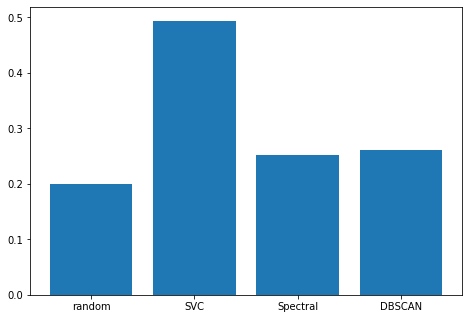

In [108]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['random', 'SVC', 'Spectral', 'DBSCAN'], [1/5, 0.494, 0.251, 0.26])
plt.show()